In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# Load the dataset
data = pd.read_csv('HomeC.csv')

C:\Users\dekat\AppData\Local\Temp\ipykernel_7396\1805145799.py:2: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('HomeC.csv')


In [55]:
data.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [56]:
data.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
data.shape

(503911, 32)

In [58]:
data.info

<bound method DataFrame.info of               time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0       1451624400  0.932833  0.003483            0.932833         0.000033   
1       1451624401  0.934333  0.003467            0.934333         0.000000   
2       1451624402  0.931817  0.003467            0.931817         0.000017   
3       1451624403  1.022050  0.003483            1.022050         0.000017   
4       1451624404  1.139400  0.003467            1.139400         0.000133   
...            ...       ...       ...                 ...              ...   
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   
503910           \       NaN       NaN                 NaN              NaN   

        Furnace 1 [

In [59]:
data.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [60]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
use [kW],503910.0,0.858962,1.058207,0.000000,0.367667,0.562333,0.970250,14.714567
gen [kW],503910.0,0.076229,0.128428,0.000000,0.003367,0.004283,0.083917,0.613883
House overall [kW],503910.0,0.858962,1.058207,0.000000,0.367667,0.562333,0.970250,14.714567
Dishwasher [kW],503910.0,0.031368,0.190951,0.000000,0.000000,0.000017,0.000233,1.401767
Furnace 1 [kW],503910.0,0.099210,0.169059,0.000017,0.020233,0.020617,0.068733,1.934083
Furnace 2 [kW],503910.0,0.136779,0.178631,0.000067,0.064400,0.066633,0.080633,0.794933
Home office [kW],503910.0,0.081287,0.104466,0.000083,0.040383,0.042217,0.068283,0.971750
Fridge [kW],503910.0,0.063556,0.076199,0.000067,0.005083,0.005433,0.125417,0.851267
Wine cellar [kW],503910.0,0.042137,0.057967,0.000017,0.007133,0.008083,0.053192,1.273933
Garage door [kW],503910.0,0.014139,0.014292,0.000017,0.012733,0.012933,0.013100,1.088983


In [61]:
data.isnull().sum()

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In [62]:
data.isnull().sum().sum()

31

In [63]:
data.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [64]:
data.axes

[RangeIndex(start=0, stop=503911, step=1),
 Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
        'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
        'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
        'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
        'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
        'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
        'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
        'dewPoint', 'precipProbability'],
       dtype='object')]

In [65]:
df1 = data.dropna(subset=['use [kW]'],inplace=True)

In [66]:
data.isnull().sum().sort_values(ascending=False)

time                   0
use [kW]               0
dewPoint               0
precipIntensity        0
windBearing            0
cloudCover             0
windSpeed              0
pressure               0
apparentTemperature    0
summary                0
visibility             0
humidity               0
icon                   0
temperature            0
Solar [kW]             0
Living room [kW]       0
Microwave [kW]         0
Well [kW]              0
Barn [kW]              0
Kitchen 38 [kW]        0
Kitchen 14 [kW]        0
Kitchen 12 [kW]        0
Garage door [kW]       0
Wine cellar [kW]       0
Fridge [kW]            0
Home office [kW]       0
Furnace 2 [kW]         0
Furnace 1 [kW]         0
Dishwasher [kW]        0
House overall [kW]     0
gen [kW]               0
precipProbability      0
dtype: int64

In [67]:
data.isnull().sum().sum()

0

In [68]:
data.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

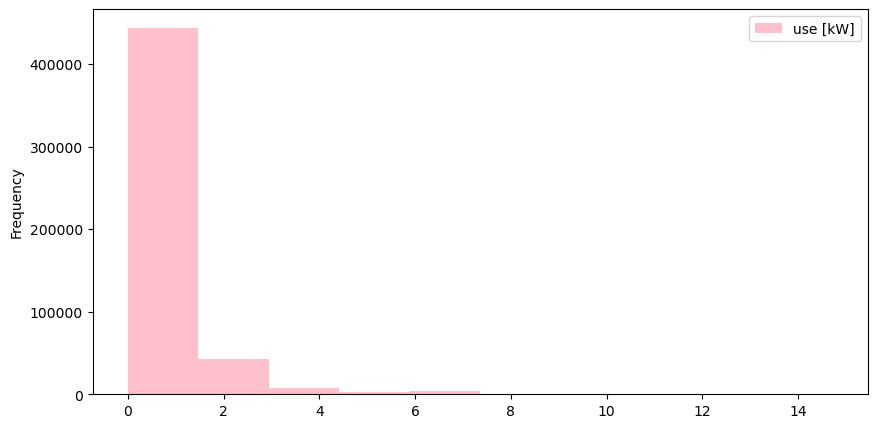

In [69]:
data['use [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

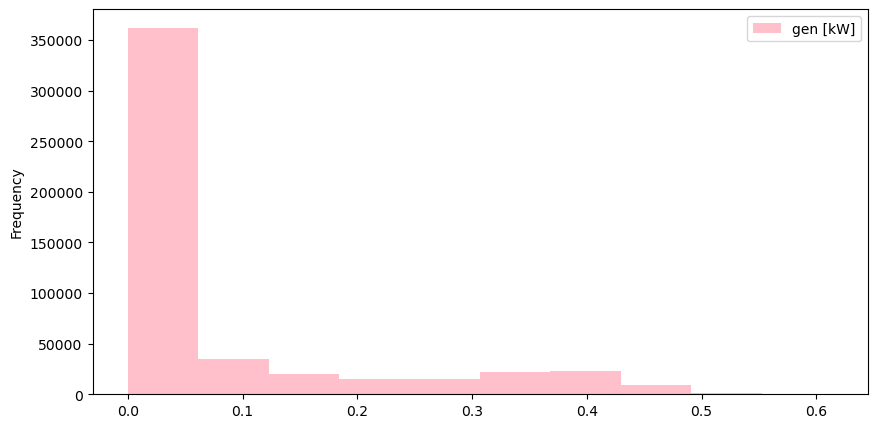

In [70]:
data['gen [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

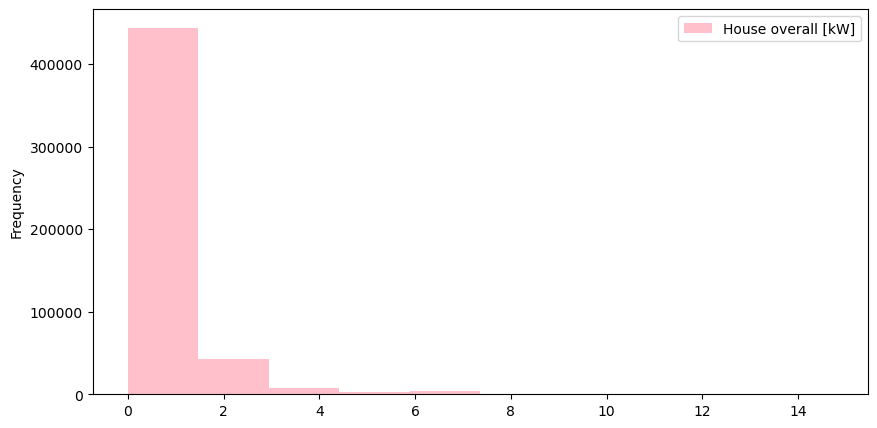

In [71]:
data['House overall [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

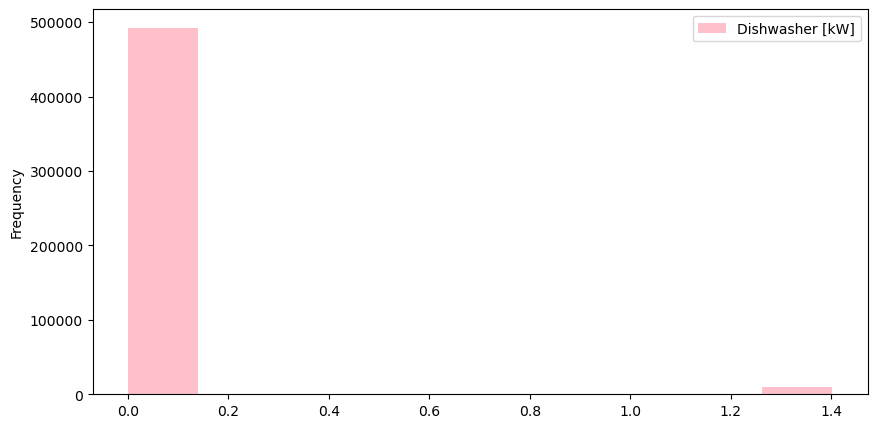

In [72]:
data['Dishwasher [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

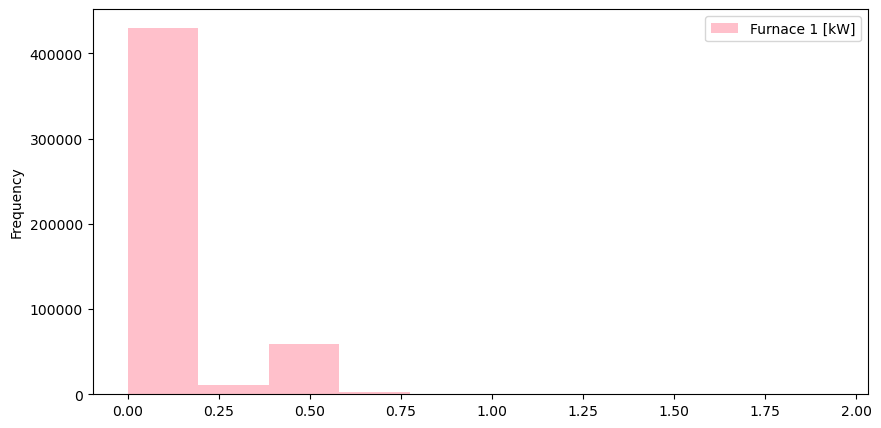

In [73]:
data['Furnace 1 [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

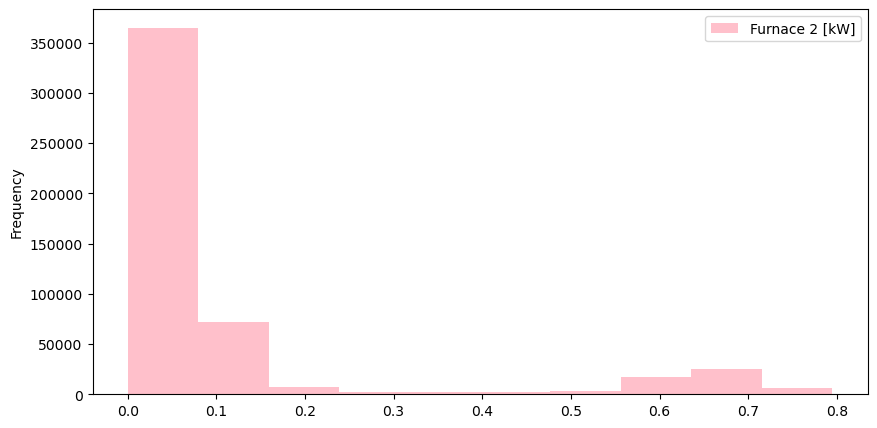

In [74]:
data['Furnace 2 [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

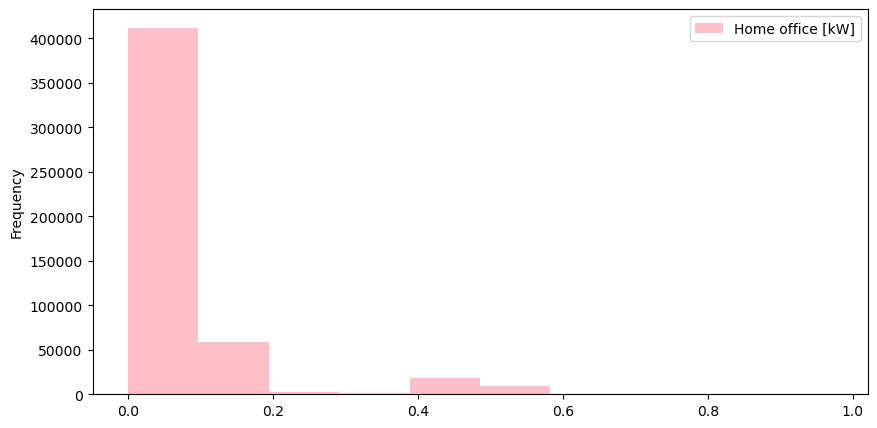

In [75]:
data['Home office [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

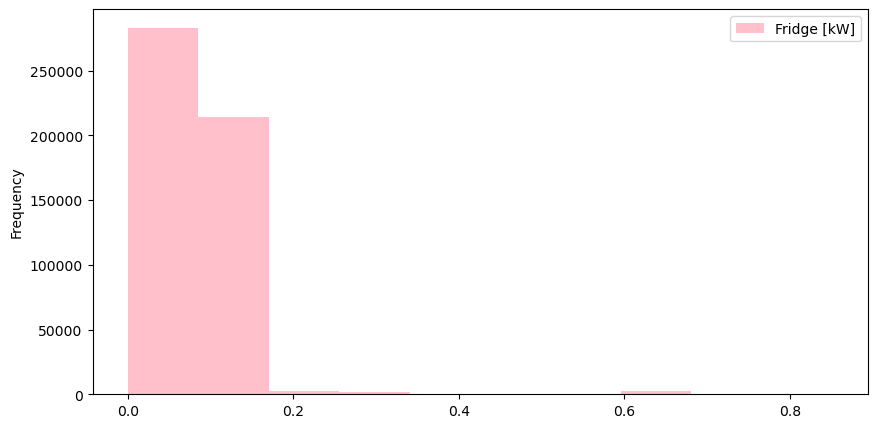

In [76]:
data['Fridge [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

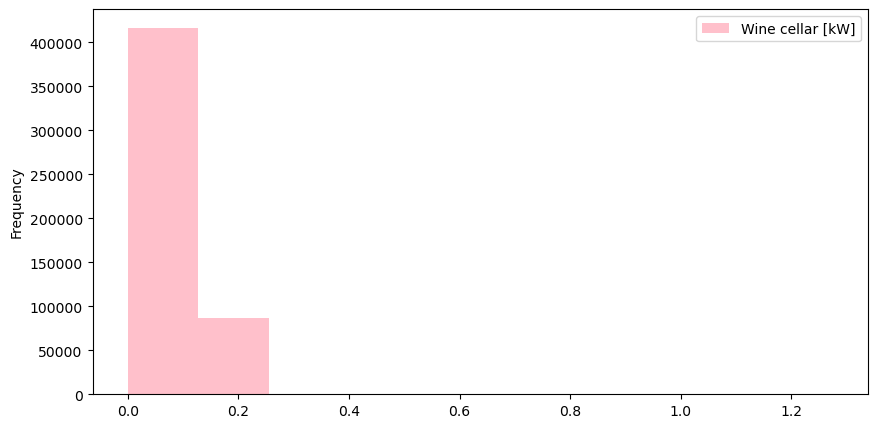

In [77]:
data['Wine cellar [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

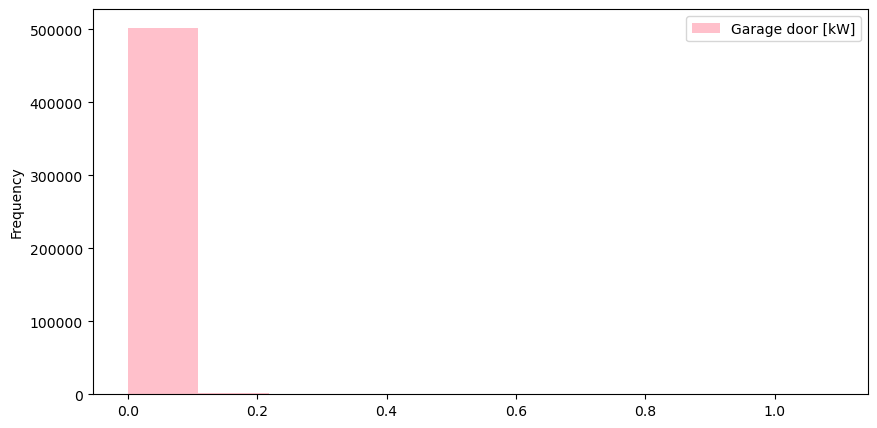

In [78]:
data['Garage door [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

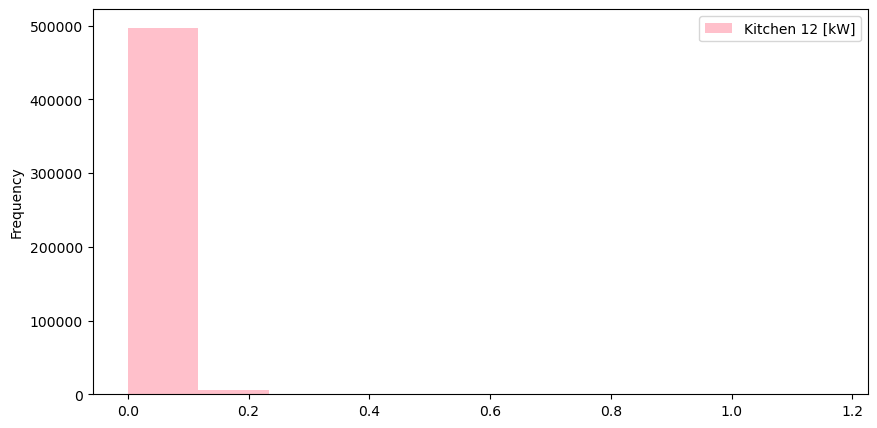

In [79]:
data['Kitchen 12 [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

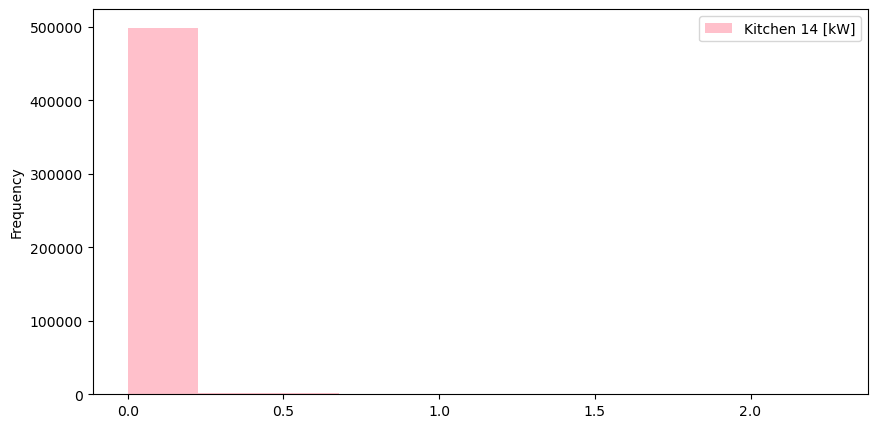

In [80]:
data['Kitchen 14 [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

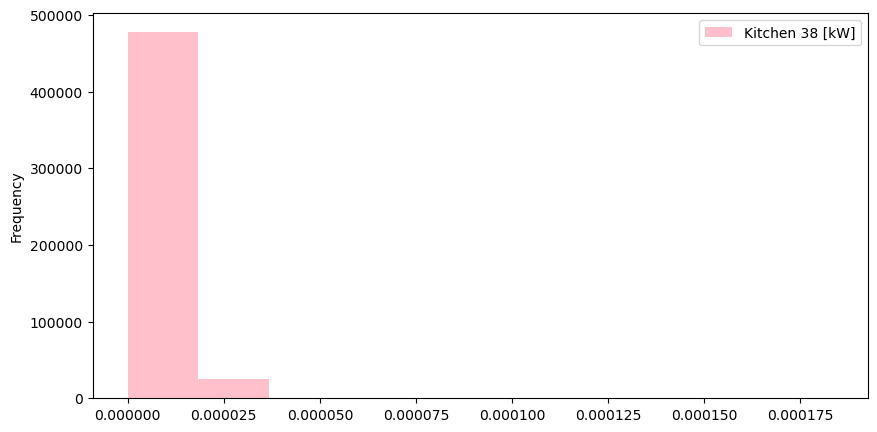

In [81]:
data['Kitchen 38 [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

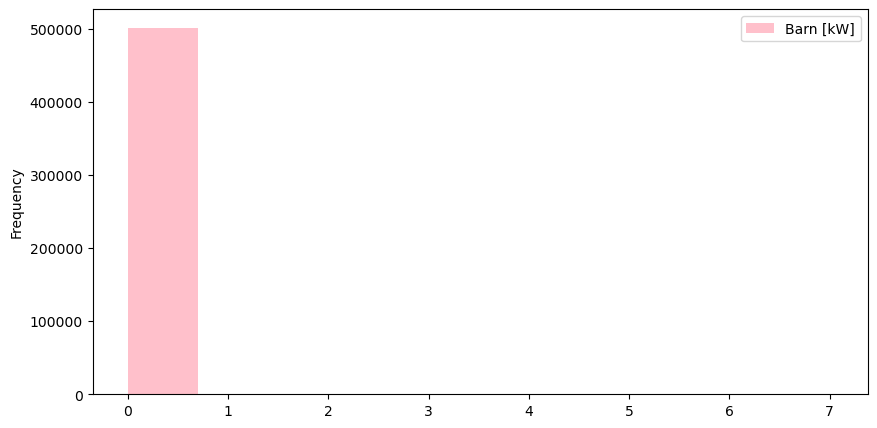

In [82]:
data['Barn [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

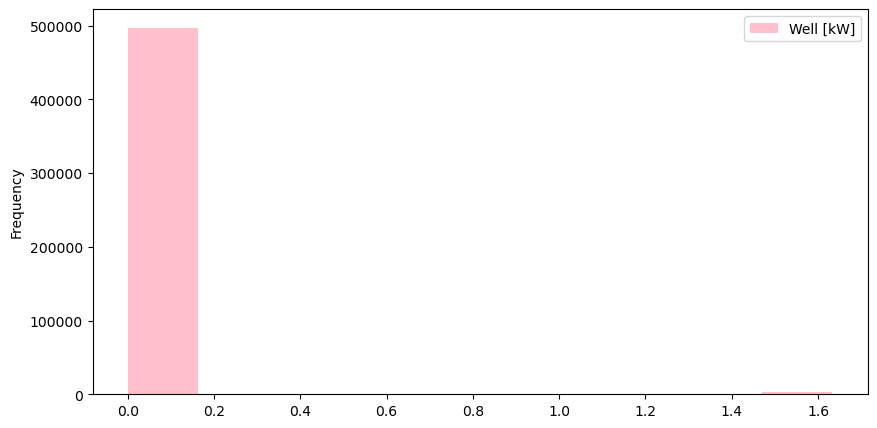

In [83]:
data['Well [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

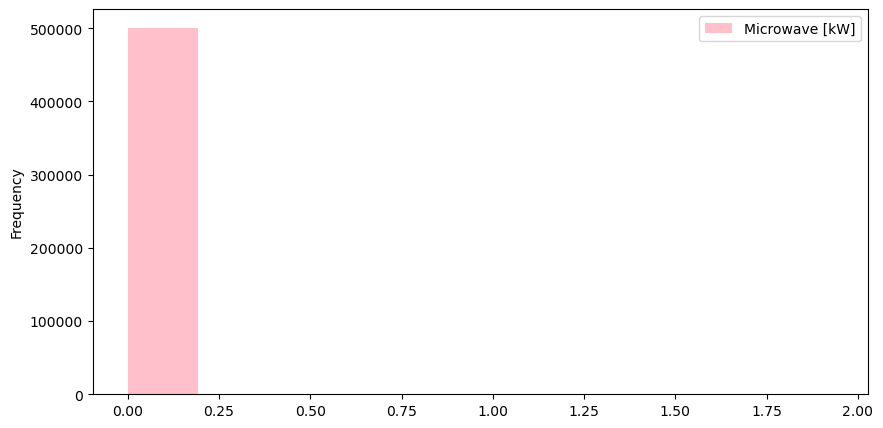

In [84]:
data['Microwave [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

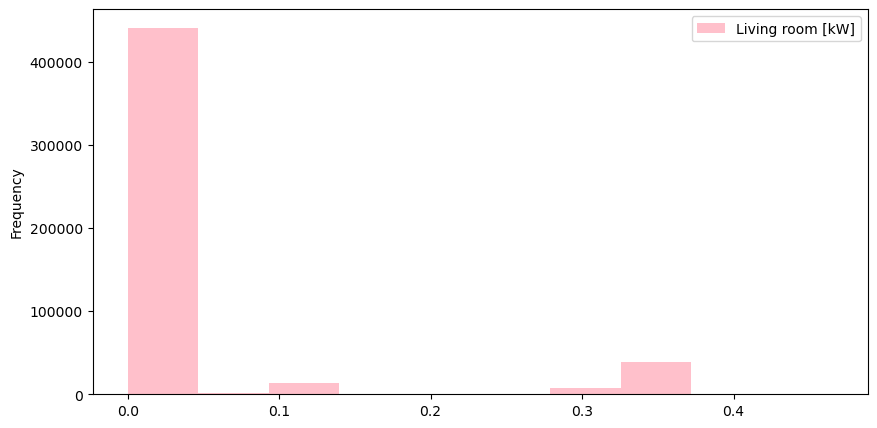

In [85]:
data['Living room [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

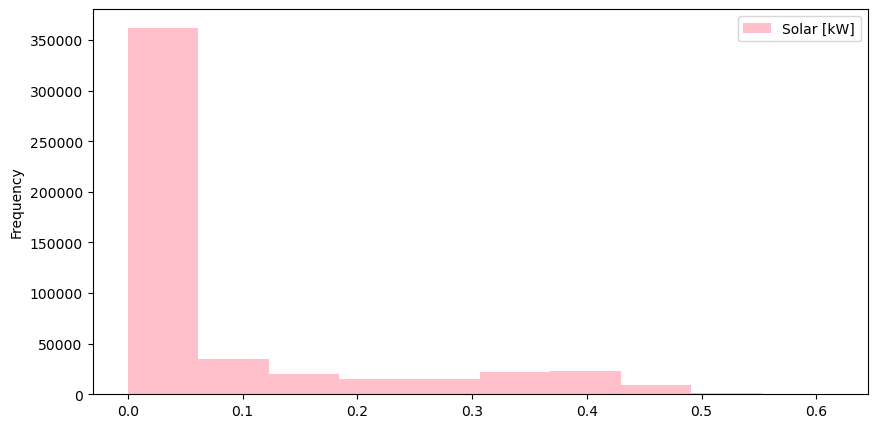

In [86]:
data['Solar [kW]'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

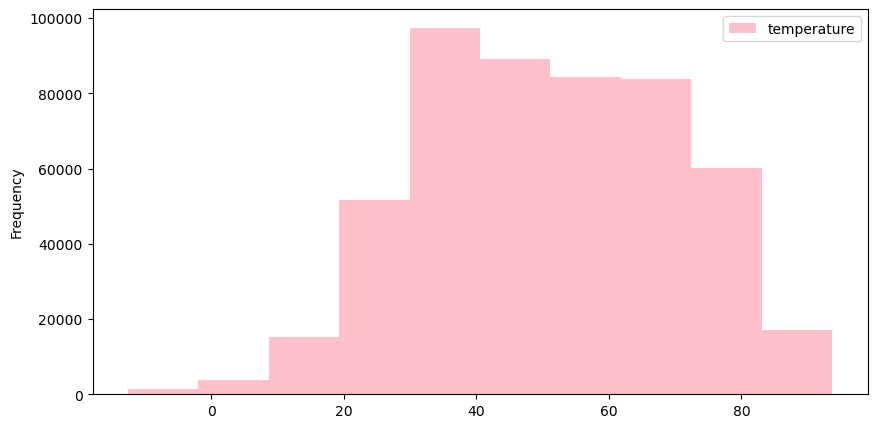

In [87]:
data['temperature'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

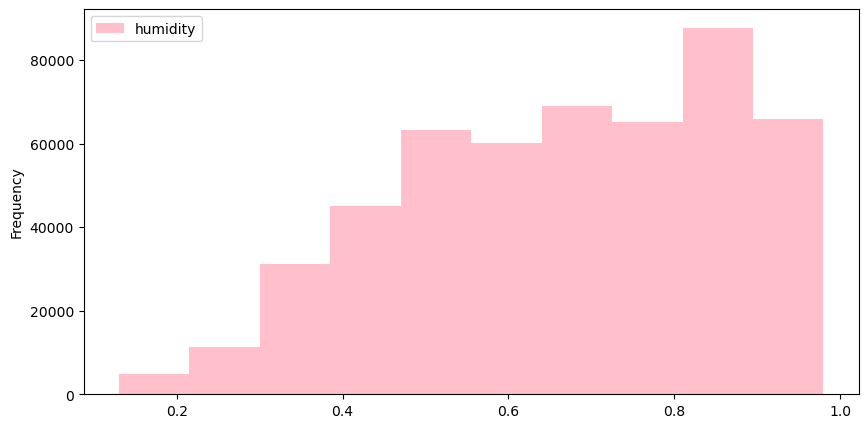

In [88]:
data['humidity'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

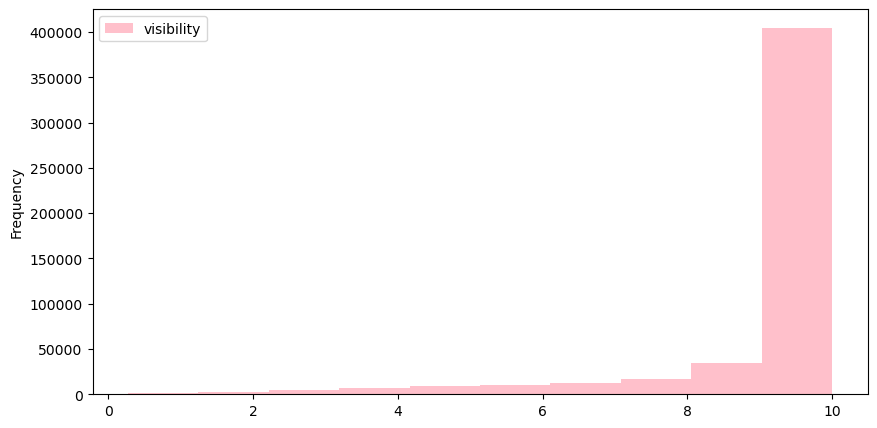

In [89]:
data['visibility'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

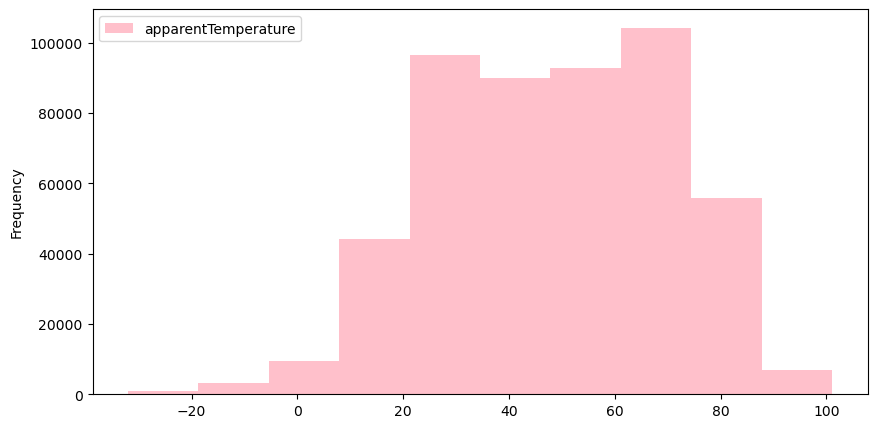

In [90]:
data['apparentTemperature'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

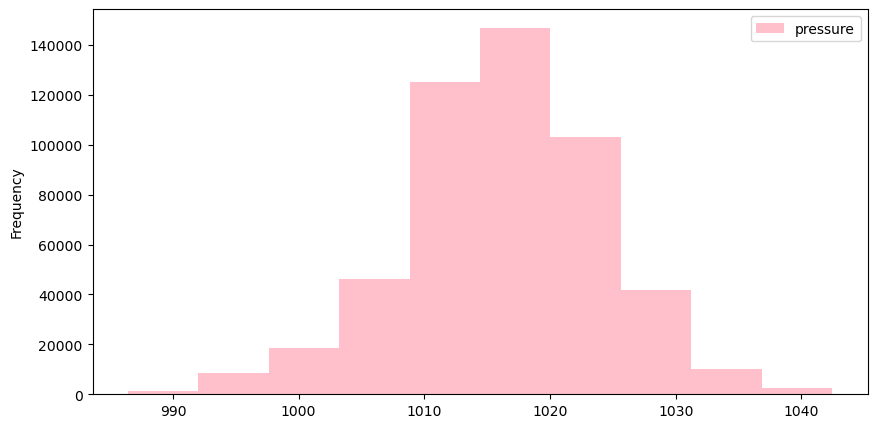

In [91]:
data['pressure'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

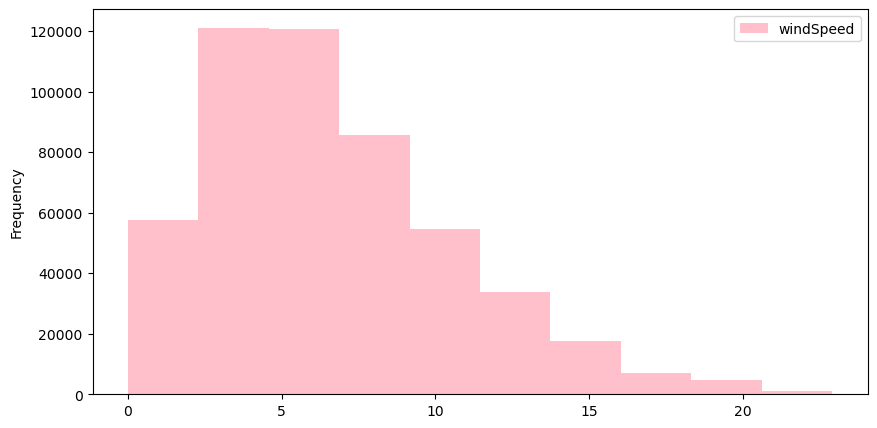

In [92]:
data['windSpeed'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

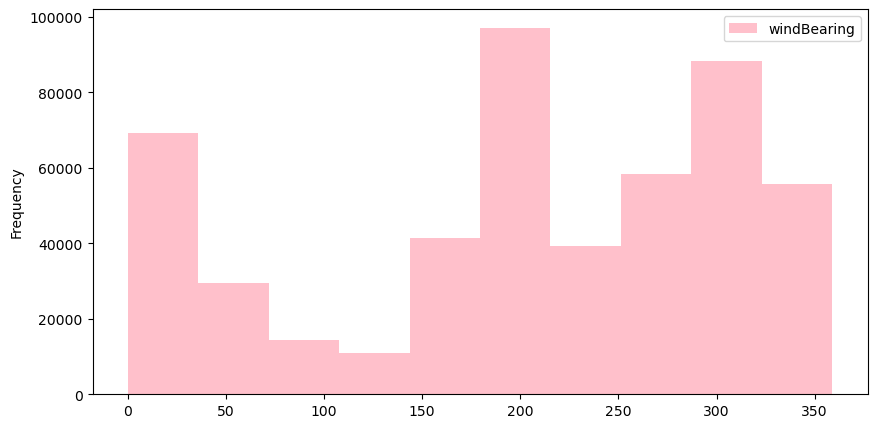

In [93]:
data['windBearing'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

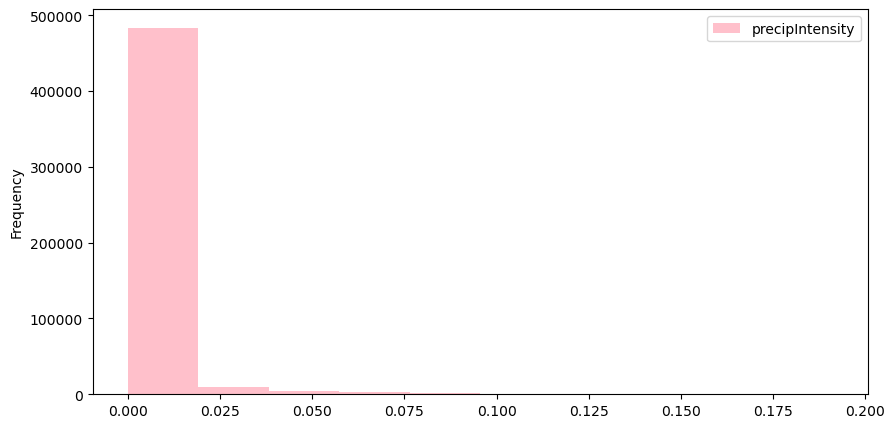

In [94]:
data['precipIntensity'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

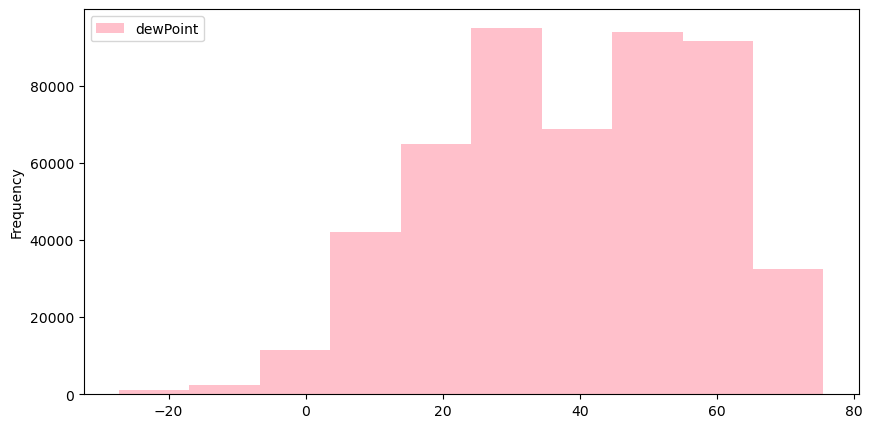

In [95]:
data['dewPoint'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

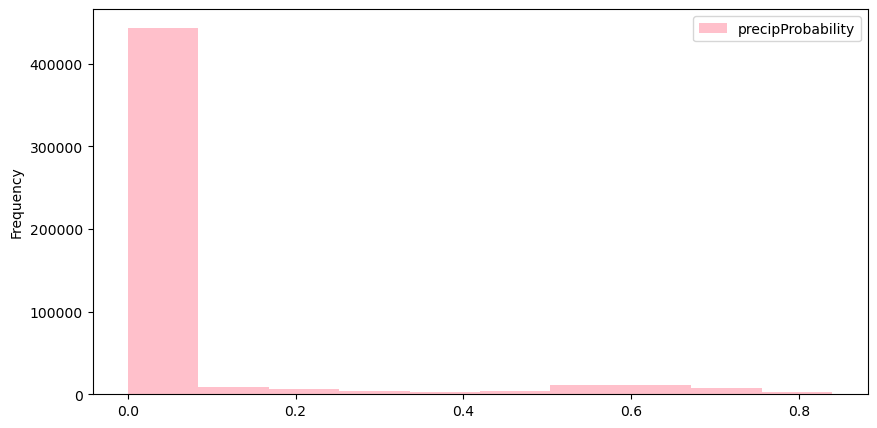

In [96]:
data['precipProbability'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

In [97]:
data

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [142]:
data.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [154]:
# Features (independent variable) and target (dependent variable)
# Independent variable (Temperature)
X = data[['temperature','House overall [kW]','humidity','apparentTemperature',
       'pressure', 'windSpeed', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability']]
# Dependent variable (Energy Consumption)
y = data['summary']

In [162]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [163]:
model = LogisticRegression()

In [164]:
model.fit(X_train, y_train)

C:\Users\dekat\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
y_pred = model.predict(X_test)

In [166]:
y_pred

array(['Clear', 'Clear', 'Clear', ..., 'Clear', 'Clear', 'Clear'],
      dtype=object)

In [167]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7469009221162369


In [168]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)